In [1]:
import numpy as np              # load numerical module
import matplotlib.pyplot as plt # load plotting module
import astropy.io.fits as fits  # load FITS module

## What is measurement uncertainty?

## Why/how do we use it?

- Estimate the measurement uncertainty by taking sample measurements, use $\sigma$
- Compare to a priori uncertainty estimate
- If rough agreement, use sample value, otherwise find problem

## What happens if we have a quantity that we calculate based on things we measure?

### e.g., you measure the location of a car at different times t to define its speed:
- what are the errors/uncertainties in your measurements?
- how do you calculate the speed?
- is the speed uncertainty-less or should you have a means to calculate its uncertainty? ideas on what you should take into account?



- Eror propagation: using the errors you know ($\delta x, \delta t$) to calculate the error of the combined parameter ($\delta v$)

<br>
<br>

- Given: 
    - variables: $u$, $v$, ... observed with samples with number of draws $N_u$ , $N_v$ , ... and individual draws called $u_i$ , $v_i$ , ... <br>
    - we can calculate mean values $\bar u$, $\bar v$, ...  and 
    - standard errors $\sigma_u$ , $\sigma_v$ , ... <br>
    
    
- We know function: $f (u, v, ...)$ connecting them and **want** $\sigma_f$ <br>

    - Calculate $f (\bar u, \bar v, ...)$. This is the best estimate of $\bar f$ (would be true mean for $\infty$ measurements, but that is impossible to get...)
    - It is approximate if $\bar u, \bar v, ...$ are calculated with small $N$, approaches true for large $N$.
   
   
   
   
   

- Plot a curve, choose $\bar x$ and $\sigma_{\bar x}$ , linearize at $\bar x$, trace to $f$ axis, show $\bar f$ and $\sigma_{\bar f}$.

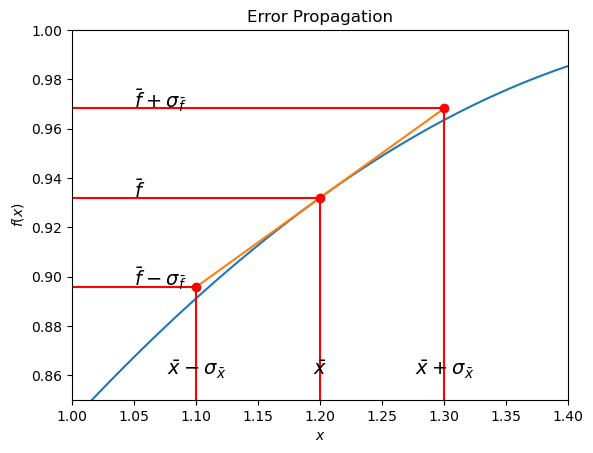

In [1]:
# Plot of error propagation (really uncertainty propagation)
import numpy as np
import matplotlib.pyplot as plt

N  = 100
x  = np.linspace(0.8, np.pi / 2, N)
xp = 1.2
sx = 0.1
y  = np.sin(x)
yp = np.sin(xp)
ym = np.cos(xp)

# Convenience function for point-slope line
def psline(x, m, yp, xp):
    return m * (x - xp) + yp

yl = psline(x, ym, yp, xp)
xs = np.array((xp - sx,
               xp + sx))
ys = psline(xs, ym, yp, xp)
sy = yp-ys[0]

# Error and value lines
lelx = np.array((xp - sx, xp - sx,     0))
lely = np.array((      0,   ys[0], ys[0]))
fulx = np.array((xp     , xp     ,     0))
fuly = np.array((      0, yp     ,    yp))
helx = np.array((xp + sx, xp + sx,     0))
hely = np.array((      0,   ys[1], ys[1]))

plt.plot(x, y)
plt.plot(xs, ys)
plt.xlim(1   , 1.4)
plt.ylim(0.85, 1  )
plt.plot(lelx, lely, "-or")
plt.plot(fulx, fuly, "-or")
plt.plot(helx, hely, "-or")
plt.text(xp - sx,  0.86  , r"$\bar x - \sigma_{\bar x}$", ha="center", size=14)
plt.text(xp     ,  0.86  , r"$\bar x$"                  , ha="center", size=14)
plt.text(xp + sx,  0.86  , r"$\bar x + \sigma_{\bar x}$", ha="center", size=14)
plt.text(1.05   , yp - sy, r"$\bar f - \sigma_{\bar f}$", ha="left", size=14)
plt.text(1.05   , yp     , r"$\bar f$"                  , ha="left", size=14)
plt.text(1.05   , yp + sy, r"$\bar f + \sigma_{\bar f}$", ha="left", size=14)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Error Propagation")
foo = 1 # suppress printing of the final value by not having one


- If we knew the real error of our quantities $\Delta u$, $\Delta v$ etc and they were small, we could use a simple Taylor exp. and get the real error $\Delta f$
   (e.g., for car $u = \frac{s}{t}$, if we know real $\Delta s$, $\Delta t$ for obs. $u_0, t_0$: $\Delta u = u_0 + \Delta u \frac{1}{t} + \Delta t \frac{-u}{t^2} $); but if errors are big this is not enough...we need to take into account more terms incl. cross derivatives
   

- Consider the spread (variance) in values of $f_i = f(u_i , v_i , ...)$:
$$\sigma_{f}^{2} = \lim_{N\rightarrow \infty}\left[
\frac{1}{N}\sum(f_{i}-\bar f)^{2}\right]$$
   - We’re ignoring that it should be $N-m$ in denominator, where $m$ would be the number of variables in the equation.
   - FYI, it would be $N$ in the denominator if the mean is the real mean and not one estimated from the data. But, that rarely, if ever, happens.
   
- We can express, like with u before, the deviation $f-f_i$ as a Taylor expansion:
$$f_{i}-\bar f \simeq (u_{i}-\bar u)\frac{\partial f}{\partial u} +
                      (v_{i}-\bar v)\frac{\partial f}{\partial v} + ...$$


- Combining these, we can get $\sigma_f^2$ in terms of $\sigma_u^2$, $\sigma_v^2$, ..., which we measured:
$$ \def\pder#1#2{\left(\frac{\partial #1}{\partial #2}\right)}
\def\sb{_}
\def\sp{^}
\begin{eqnarray}
\sigma\sb{f}\sp{2}
 & \simeq & \lim\sb{N\rightarrow \infty}\frac{1}{N}\sum
   \left[(u\sb{i}-\bar u)\frac{\partial f}{\partial u} +
         (v\sb{i}-\bar v)\frac{\partial f}{\partial v} + ...
   \right]\sp{2} \\
 & \simeq & \lim\sb{N\rightarrow \infty}\frac{1}{N}\sum
   \left[(u\sb{i}-\bar u)\sp{2}\pder{f}{u}\sp{2} +
         (v\sb{i}-\bar v)\sp{2}\pder{f}{v}\sp{2} + ...\right.\\
 &        & \hspace{1 in}  \left.2 (u\sb{i}-\bar u)(v\sb{i}-\bar v)
                    \frac{\partial f}{\partial u} \frac{\partial f}{\partial v}
              + ... \right]
\end{eqnarray}$$

Note that the first two terms are: $\sigma_u^2 = \lim\sb{N\rightarrow \infty}[\frac{1}{N}\Sigma(u_i-\bar u)^2] $ and $\sigma_v^2= \lim\sb{N\rightarrow \infty}[\frac{1}{N}\Sigma(v_i-\bar v)^2] $, and we can introduce the covariance $\sigma_{uv}^2= \lim\sb{N\rightarrow \infty}[\frac{1}{N}\Sigma(u_i-\bar u)(v_i-\bar v)] $ which leads us to the 


<div class="alert alert-block alert-warning">
<b> Error Propagation Equation:
$$\sigma\sb{f}\sp{2} \simeq  \sigma\sb{u}\sp{2} \pder{f}{u}\sp{2}
                         + \sigma\sb{v}\sp{2} \pder{f}{v}\sp{2}
                         + ...
                         + 2\sigma\sb{uv}\sp{2}
                            \frac{\partial f}{\partial u}
                            \frac{\partial f}{\partial v}
                         + ...$$

- If $u$ and $v$ are uncorrelated (one’s not positive when the other is, and vice versa), then ($u_i - \bar u)(v_i - \bar v)$ will be negative half the time and positive half the time, and the sum will tend to zero. So, for uncorrelated variables, we can drop the co-variance terms. In that case our eq. simplifies to:



<div class="alert alert-block alert-warning">
<b> Error Propagation Equation (uncorrelated quantities):
$$\sigma\sb{f}\sp{2} \simeq  \sigma\sb{u}\sp{2} \pder{f}{u}\sp{2}
                         + \sigma\sb{v}\sp{2} \pder{f}{v}\sp{2}
                         + ...
                         + ...$$

- Equation is important for two reasons:
    - Evaluate $\sigma_f$
    - Determine which input variables have the greatest influence on the output, and therefore
need the smallest errors.
    - Or, in other words, how should I spend my precious allotment of telescope time?

### General examples:

- if $x = \alpha u v $, with $\alpha$ a constant, what is $\sigma^2_x$?

    - $\pder{x}{u}$ = ...? = $\alpha v$
    - $\pder{x}{v}$ = ...? = $\alpha u$ 
    - Together: $\sigma^2_x = (\alpha v \sigma^2_u)^2 + (\alpha u \sigma^2_v)^2+ (2 \alpha^2 u v \sigma_{uv})^2$
    
- if $x = \frac{\alpha u}{v}$

    - $\pder{x}{u}$ = ...? = $\frac{\alpha}{v}$
    - $\pder{x}{v}$ = ...? = $\frac{\alpha u}{v^2}$ 
    - Together: $\sigma^2_x = (\frac{\alpha}{v} \sigma^2_u)^2 + (\frac{\alpha u}{v^2} \sigma^2_v)^2+ (2 \frac{\alpha^2 u}{v^3} \sigma_{uv})^2$
   

In [ ]:
## For most cases we can assume our data is independent

### 1. From Bev. Ch 3: example 3.3

### In an experiment to count particles emitted by a decaying radioactive source, we measure N1 = 723 counts in a 15-s time interval at the beginning of the experiment and N2 = 19 counts in a 15-s time interval later in the experiment. The events are random and obey Poisson statistics. Assume that we have made a very careful measurement of the background counting rate in the absence of the radioactive source and obtained a value B = 14.2 counts with negligible error for the same time interval D. 
- What is the uncertainty in our measurement N1? What is it for N2?
- If the relative uncertainty is $\frac{\sigma_x}{x}$, with x the corrected number of counts (corrected for the background), what is the relative uncertainties of N1 and N2?

In [4]:
#since they follow poisson uncertainties are:
sigma_N1 = np.sqrt( 723 )
sigma_N2 = np.sqrt( 19  )

print( sigma_N1, sigma_N2 )

26.888659319497503 4.358898943540674


In [6]:
#relative uncertainties:
rel_sigma_N1 = sigma_N1/ (723 - 14.2 )
rel_sigma_N2 = sigma_N2/ (19 - 14.2 )

print( rel_sigma_N1 *100 , rel_sigma_N2 *100 )

3.793546743721431 90.81039465709736


### 2. You measure a triangle with a ruler. You make multiple measurements of its half base and its height and conclude that $h = 12.0 \pm 0.2$ and $d_{1/2} = 4.5 \pm 0.1 $. What is the surface area of the triangle? Format the print statement to correctly show your significant digits (e.g., 20.00+-0.05).

In [3]:
# List given dimensions
h = 12.0
h_err = 0.2
d = 4.5
d_err = 0.1

# Calculate surface error
# 1/2 h * b
surface_area = (h * d)

# Calculate the error
surface_err = np.sqrt((d * h_err)**2 + (h * d_err)**2)

print('The surface area of the triangle is: {0:.2f} +- {1:.2f}' .format(surface_area, surface_err)) 

The surface area of the triangle is: 54.00 +- 1.50


### 3. (15 minutes) In the EM lab you take two resistances $R_1 = 3.2 \pm 0.1 \Omega$ and $R_2 = 7.85 \pm 0.25 \Omega$. What is the total resistance of your circuit when connected in series ($R_{tot,s}$) and what when connected in parallel ($R_{tot,p}$) ? If we apply $I =10.2\pm 0.1 A$ to the circuit, what is the V for each case? Format your answer to have a 2 digit accuracy.

In [7]:
# List given data
r1 = 3.2
r1_err = 0.1
r2 = 7.85
r2_err = 0.25
i = 10.2
i_err = 0.1

# Calculate total resistance in series
r_tot_s = r1 + r2
r_tot_s_err = np.sqrt((r1 * h_err)**2 + (h * d_err)**2)

# Calculate total resistance in parallel
r_par = 1/r1 + 1/r2


V1 = r_tot_s * i


# Print answer
print('The total resistance in series is {0:.2f} +- {1:.2f}' .format(r_tot_surf, 
print('\nThe voltage when in series is:)

SyntaxError: invalid decimal literal (942889417.py, line 21)

#### 4. (15 minutes) What is:
- $(16 \pm 8) \times (32 \pm 8 )$?

- $(20 \pm 5) \times (5 \pm 2) $ ?

- $(2.5\pm 0.5) / (3.1 \pm 0.3) $ ?

### 5.  (20 minutes) File exoplanet.eu_catalog_08_2023.csv has all exoplanet detections as of 08/28/2023 (from http://exoplanet.eu/catalog/). Use an appropriate method to read the data. Make array ***xp_mass*** and ***xp_radius*** with the masses and radii of confirmed exoplanets. Make a publication ready plot that shows the mass vs radius of exoplanets that have both quantities measured (with errors). Calculate the density for these planets (with error) and plot it vs the planet mass.

In [25]:
#import pandas as pd

In [38]:
#let's filter to get rid of data that have 'nans' in mass or radius
#data_pd_filt = data_pd[ data_pd[ ['mass', 'radius']].notnull().all(1) ]

In [39]:
#data_pd.describe


In [51]:
c1 = 6991100000 #Jupiter radius in centimeters
c2 = 1.898e30   #Jupiter mass in grams

